In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,NaN,NaN,NaN,71.78,0.06,NaN,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,NaN,NaN,NaN,NaN,0.00,0.0
3,1.51766,13.21,3.69,1.29,NaN,0.57,NaN,NaN,NaN
4,NaN,13.27,NaN,NaN,NaN,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,NaN,0.00,NaN,NaN,NaN
212,1.51651,NaN,0.00,1.94,73.61,0.00,NaN,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	10
float64		column 2	20
float64		column 3	30
float64		column 4	53
float64		column 5	63
float64		column 6	43
float64		column 7	83
float64		column 8	50
float64		column 9	20


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,204.000000,194.000000,184.000000,161.000000,151.000000,171.000000,131.000000,164.000000,194.000000
mean,1.518363,13.374588,2.747283,1.447081,72.702649,0.487719,8.903282,0.168537,0.053247
std,0.003035,0.743083,1.389219,0.478884,0.742577,0.560577,1.151921,0.505805,0.093017
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.870000,0.000000,0.000000
25%,1.516517,12.892500,2.362500,1.200000,72.335000,0.130000,8.320000,0.000000,0.000000
50%,1.517685,13.295000,3.480000,1.360000,72.850000,0.560000,8.590000,0.000000,0.000000
75%,1.519165,13.772500,3.600000,1.620000,73.100000,0.610000,9.050000,0.000000,0.090000
max,1.533930,15.790000,3.980000,3.500000,75.410000,6.210000,14.680000,3.150000,0.510000


<AxesSubplot:>

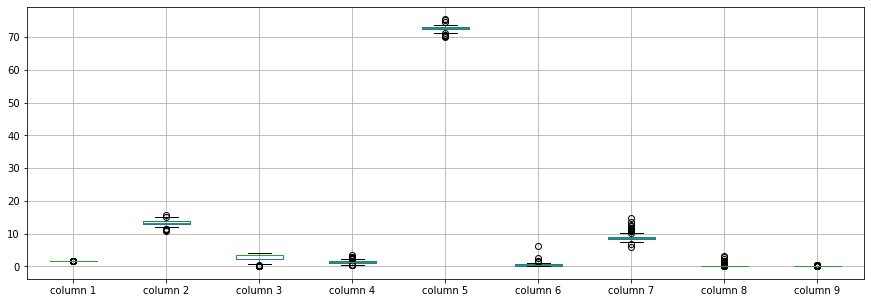

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518363
column 2    13.374588
column 3     2.747283
column 4     1.447081
column 5    72.702649
column 6     0.487719
column 7     8.903282
column 8     0.168537
column 9     0.053247
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.068398,-0.116927,-0.366068,-0.554433,-0.263243,0.743587,0.081975,0.058968
column 2,-0.068398,1.000000,-0.291825,0.187263,-0.287187,-0.286257,-0.030911,0.253081,-0.207049
column 3,-0.116927,-0.291825,1.000000,-0.430974,-0.209488,0.051879,-0.394559,-0.477209,0.112170
column 4,-0.366068,0.187263,-0.430974,1.000000,-0.073701,0.265942,-0.266483,0.536377,-0.073983
column 5,-0.554433,-0.287187,-0.209488,-0.073701,1.000000,-0.149433,-0.211842,-0.084156,0.043485
column 6,-0.263243,-0.286257,0.051879,0.265942,-0.149433,1.000000,-0.326869,-0.048542,0.043922
column 7,0.743587,-0.030911,-0.394559,-0.266483,-0.211842,-0.326869,1.000000,-0.164315,-0.011061
column 8,0.081975,0.253081,-0.477209,0.536377,-0.084156,-0.048542,-0.164315,1.000000,-0.041934
column 9,0.058968,-0.207049,0.112170,-0.073983,0.043485,0.043922,-0.011061,-0.041934,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+54,9+54+54,9+54+54+54,9+54+54+54+54,9+54+54+54+54+54,9+54+54+54+54+54+54,9+54+54+54+54+54,9+54+54+54+54,9+54+54+54,9+54+54,9+54,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=70)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 74.31382751464844
Epoch: 1 , loss: 74.70108912541316
Epoch: 2 , loss: 75.20802277785081
Epoch: 3 , loss: 75.08302160409781
Epoch: 4 , loss: 75.14015021690956
Epoch: 5 , loss: 75.8478378882775
Epoch: 6 , loss: 75.14007040170523
Epoch: 7 , loss: 75.92707766019382
Epoch: 8 , loss: 75.7912741440993
Epoch: 9 , loss: 75.12361409113957
Epoch: 10 , loss: 75.3427878159743
Epoch: 11 , loss: 75.31127166748047
Epoch: 12 , loss: 75.64320520254282
Epoch: 13 , loss: 74.24303935124324
Epoch: 14 , loss: 75.0596700815054
Epoch: 15 , loss: 74.02609517024113
Epoch: 16 , loss: 73.63973236083984
Epoch: 17 , loss: 73.59807293231671
Epoch: 18 , loss: 73.06756591796875
Epoch: 19 , loss: 72.72472234872671
Epoch: 20 , loss: 72.86678695678711
Epoch: 21 , loss: 72.22248165424054
Epoch: 22 , loss: 72.97032869779147
Epoch: 23 , loss: 72.66543755164513
Epoch: 24 , loss: 72.2594733605018
Epoch: 25 , loss: 70.97408998929538
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,1.841795,-0.962424,0.624756,0.000000,0.000000,1.216797,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,-0.737247,-54.355124,-0.076354,-4.137234,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,-52.264907,0.000000,-5.013406,0.105862,0.051190
4,0.205004,0.000000,-0.660269,0.204747,-24.795523,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
211,0.000000,0.000000,0.000000,0.000000,-63.943150,0.000000,-6.752979,-1.592807,0.012140
212,0.000000,-12.811059,0.000000,0.000000,0.000000,0.000000,-7.428174,-1.531608,0.032251


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(442.2334641191997, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.4055565586479741

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,15.481795,3.527576,1.724756,71.780000,0.060000,9.966797,0.000000,0.000000
1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,1.516180,13.530000,3.550000,0.802753,18.634876,0.313646,3.642766,0.000000,0.000000
3,1.517660,13.210000,3.690000,1.290000,20.345093,0.570000,3.206594,0.105862,0.051190
4,1.722424,13.270000,2.959731,1.444747,48.284477,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.880000,72.610000,0.080000,9.180000,1.060000,0.000000
210,1.516850,14.920000,0.000000,1.990000,73.060000,0.000000,8.400000,1.590000,0.000000
211,1.520650,14.360000,0.000000,2.020000,9.476850,0.000000,1.687021,0.047193,0.012140
212,1.516510,1.568941,0.000000,1.940000,73.610000,0.000000,1.051826,0.038392,0.032251


In [20]:
imputations[-1].to_excel("Glass_AE_20(imp).xlsx", index=False, header=False)